In [1]:
import numpy as np
import pandas as pd


In [2]:
df_train = pd.read_csv('ABSA_lab4_train.csv')
df_test = pd.read_csv('ABSA_lab4_test.csv')
 

In [3]:
df_train['polarity']

0       negative
1       positive
2       negative
3       positive
4       positive
          ...   
3151    positive
3152    positive
3153    positive
3154    positive
3155     neutral
Name: polarity, Length: 3156, dtype: object

In [4]:
df_train.head()

,id,text,aspectCategory,polarity
0,3121,But the staff was so horrible to us.,service,negative
1,2777,"To be completely fair, the only redeeming fact...",food,positive
2,2777,"To be completely fair, the only redeeming fact...",anecdotes/miscellaneous,negative
3,1634,"The food is uniformly exceptional, with a very...",food,positive
4,2534,Where Gabriela personaly greets you and recomm...,service,positive


In [5]:
df_test.head()

,id,text
0,899,Food and service was okay.
1,1349,"great for a romantic evening, or a fun evening..."
2,934,The lamb meat was under-cooked and EXTRMELY CH...
3,2199,The best pad thai i've ever had.
4,188,"Over time, the food quality has decreased subs..."


In [6]:
df_train['text'][1]

"To be completely fair, the only redeeming factor was the food, which was above average, but couldn't make up for all the other deficiencies of Teodora."

In [7]:
df_train['aspectCategory'].value_counts()

food                       1051
anecdotes/miscellaneous     956
service                     506
ambience                    368
price                       275
Name: aspectCategory, dtype: int64

In [8]:
df_train.shape

(3156, 4)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156 entries, 0 to 3155
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3156 non-null   int64 
 1   text            3156 non-null   object
 2   aspectCategory  3156 non-null   object
 3   polarity        3156 non-null   object
dtypes: int64(1), object(3)
memory usage: 98.8+ KB


In [10]:
df_train.sample(5)

,id,text,aspectCategory,polarity
1645,205,"The waitstaff are all very busy, it's not outs...",service,conflict
2956,2038,The food was boring and expensive.,price,negative
1064,2386,The dim sum servings here are a bit larger tha...,food,neutral
1679,1035,A little overpriced but worth it once you take...,food,positive
1682,3131,I just don't understand all the hype...,anecdotes/miscellaneous,negative


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df_train['polarity'] = encoder.fit_transform(df_train['polarity'])

In [13]:
df_train.head()

,id,text,aspectCategory,polarity
0,3121,But the staff was so horrible to us.,service,1
1,2777,"To be completely fair, the only redeeming fact...",food,3
2,2777,"To be completely fair, the only redeeming fact...",anecdotes/miscellaneous,1
3,1634,"The food is uniformly exceptional, with a very...",food,3
4,2534,Where Gabriela personaly greets you and recomm...,service,3


In [14]:
df_train['polarity'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       3
2       1
3       3
4       3
       ..
3151    3
3152    3
3153    3
3154    3
3155    2
Name: polarity, Length: 3156, dtype: int32>

In [15]:
# missing values
df_train.isnull().sum()

id                0
text              0
aspectCategory    0
polarity          0
dtype: int64

In [16]:
# check for duplicate values
df_train.duplicated().sum()

2

In [17]:
# remove duplicates
df_train = df_train.drop_duplicates(keep='first')

In [18]:
df_train['polarity'].value_counts()

3    1874
1     715
2     398
0     167
Name: polarity, dtype: int64

In [19]:
df_train['polarity']

0       1
1       3
2       1
3       3
4       3
       ..
3151    3
3152    3
3153    3
3154    3
3155    2
Name: polarity, Length: 3154, dtype: int32

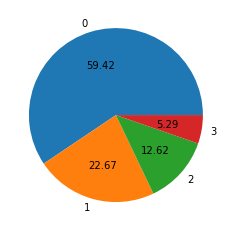

In [20]:
import matplotlib.pyplot as plt
plt.pie(df_train['polarity'].value_counts(), labels=['0','1','2','3'],autopct="%0.2f")
plt.show()

In [21]:
import nltk

In [22]:
df_train['text']

0                    But the staff was so horrible to us.
1       To be completely fair, the only redeeming fact...
2       To be completely fair, the only redeeming fact...
3       The food is uniformly exceptional, with a very...
4       Where Gabriela personaly greets you and recomm...
                              ...                        
3151    I would highly recommend this place to everyon...
3152                            The service is fantastic.
3153    I recommend that you try this hidden spot whic...
3154    The garlic mashed potatoes are hands down the ...
3155                           Food and service was okay.
Name: text, Length: 3154, dtype: object

In [23]:
df_train['num_characters']=df_train['text'].apply(len)

In [24]:
df_train

,id,text,aspectCategory,polarity,num_characters
0,3121,But the staff was so horrible to us.,service,1,36
1,2777,"To be completely fair, the only redeeming fact...",food,3,151
2,2777,"To be completely fair, the only redeeming fact...",anecdotes/miscellaneous,1,151
3,1634,"The food is uniformly exceptional, with a very...",food,3,153
4,2534,Where Gabriela personaly greets you and recomm...,service,3,67
...,...,...,...,...,...
3151,2853,I would highly recommend this place to everyon...,anecdotes/miscellaneous,3,65
3152,1163,The service is fantastic.,service,3,25
3153,216,I recommend that you try this hidden spot whic...,anecdotes/miscellaneous,3,76
3154,1109,The garlic mashed potatoes are hands down the ...,food,3,63


In [25]:
# num of words
df_train['text'].apply(lambda x:nltk.word_tokenize(x))

0         [But, the, staff, was, so, horrible, to, us, .]
1       [To, be, completely, fair, ,, the, only, redee...
2       [To, be, completely, fair, ,, the, only, redee...
3       [The, food, is, uniformly, exceptional, ,, wit...
4       [Where, Gabriela, personaly, greets, you, and,...
                              ...                        
3151    [I, would, highly, recommend, this, place, to,...
3152                     [The, service, is, fantastic, .]
3153    [I, recommend, that, you, try, this, hidden, s...
3154    [The, garlic, mashed, potatoes, are, hands, do...
3155                   [Food, and, service, was, okay, .]
Name: text, Length: 3154, dtype: object

In [26]:
# num of words
df_train['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0        9
1       31
2       31
3       31
4       12
        ..
3151    12
3152     5
3153    14
3154    13
3155     6
Name: text, Length: 3154, dtype: int64

In [27]:
df_train['num_words'] = df_train['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df_train

,id,text,aspectCategory,polarity,num_characters,num_words
0,3121,But the staff was so horrible to us.,service,1,36,9
1,2777,"To be completely fair, the only redeeming fact...",food,3,151,31
2,2777,"To be completely fair, the only redeeming fact...",anecdotes/miscellaneous,1,151,31
3,1634,"The food is uniformly exceptional, with a very...",food,3,153,31
4,2534,Where Gabriela personaly greets you and recomm...,service,3,67,12
...,...,...,...,...,...,...
3151,2853,I would highly recommend this place to everyon...,anecdotes/miscellaneous,3,65,12
3152,1163,The service is fantastic.,service,3,25,5
3153,216,I recommend that you try this hidden spot whic...,anecdotes/miscellaneous,3,76,14
3154,1109,The garlic mashed potatoes are hands down the ...,food,3,63,13


In [28]:
df_train['num_sentences'] = df_train['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df_train

,id,text,aspectCategory,polarity,num_characters,num_words,num_sentences
0,3121,But the staff was so horrible to us.,service,1,36,9,1
1,2777,"To be completely fair, the only redeeming fact...",food,3,151,31,1
2,2777,"To be completely fair, the only redeeming fact...",anecdotes/miscellaneous,1,151,31,1
3,1634,"The food is uniformly exceptional, with a very...",food,3,153,31,1
4,2534,Where Gabriela personaly greets you and recomm...,service,3,67,12,1
...,...,...,...,...,...,...,...
3151,2853,I would highly recommend this place to everyon...,anecdotes/miscellaneous,3,65,12,1
3152,1163,The service is fantastic.,service,3,25,5,1
3153,216,I recommend that you try this hidden spot whic...,anecdotes/miscellaneous,3,76,14,1
3154,1109,The garlic mashed potatoes are hands down the ...,food,3,63,13,1


In [29]:
df_train[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3154.000000,3154.000000,3154.000000
mean,77.494293,16.380469,1.017438
std,44.594101,9.029209,0.130918
min,5.000000,2.000000,1.000000
25%,45.000000,10.000000,1.000000
50%,70.000000,15.000000,1.000000
75%,101.000000,21.000000,1.000000
max,357.000000,79.000000,2.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

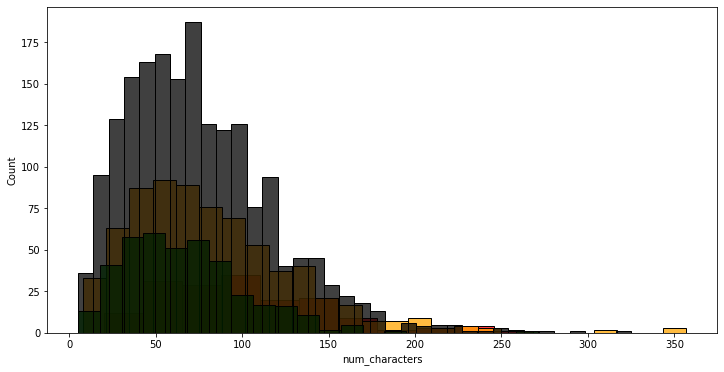

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df_train[df_train['polarity'] == 0]['num_characters'],color='red')
sns.histplot(df_train[df_train['polarity'] == 1]['num_characters'],color='orange')
sns.histplot(df_train[df_train['polarity'] == 2]['num_characters'],color='green')
sns.histplot(df_train[df_train['polarity'] == 3]['num_characters'],color='black')

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


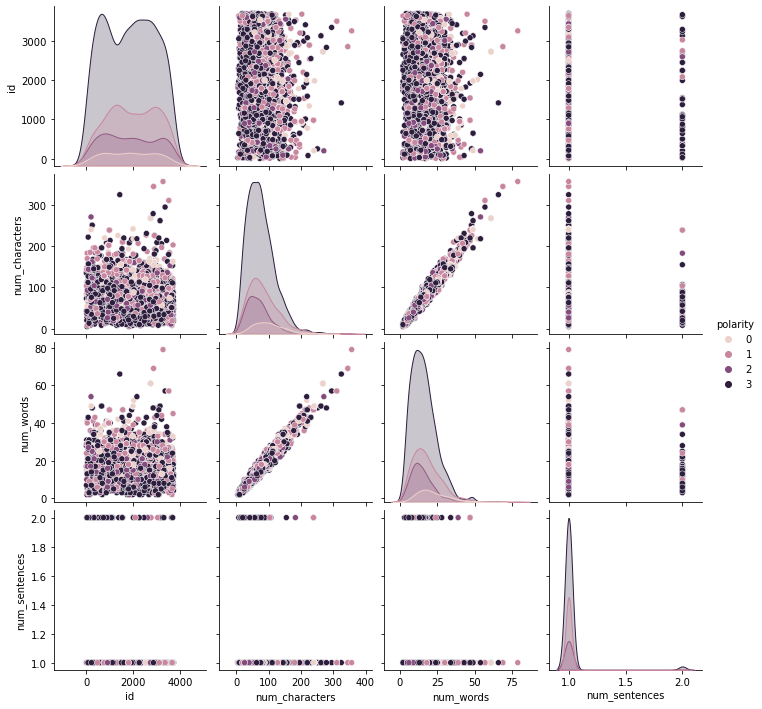

In [32]:
sns.pairplot(df_train,hue='polarity')

In [33]:
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

In [34]:
fastboot oem aliv

SyntaxError: invalid syntax (<ipython-input-34-2f83a6dea5a3>, line 1)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('aplha')


In [ ]:
df_train['transformed_text'] = df_train['text'].apply(transform_text)

In [ ]:
df_train.head()

In [ ]:
df_train['transformed_text']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [ ]:
X  = cv.fit_transform(df_train['transformed_text']).toarray()
X

In [ ]:
X.shape

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
 
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as pl

In [36]:
from tensorflow.keras.models import Sequential
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

NameError: name 'LSTM' is not defined